# Exploratory data analisis of grammy awars dataset

#### Libraries used

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from datetime import datetime
from sqlalchemy import create_engine

# Connection to database and extract data in grammys_df

In [52]:
def extract_grammys():
    with open('../config/config_EDA.json', 'r') as file:
        config = json.load(file)
    
    engine = create_engine(f'postgresql+pg8000://{config["user"]}:{config["password"]}@{config["host"]}:{config["port"]}/{config["dbname"]}')
    grammys_df = pd.read_sql_table('grammys', engine)
    return grammys_df

In [53]:
grammys_df = extract_grammys()

## General description

In [54]:
grammys_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [55]:
grammys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [56]:
grammys_df.isnull().sum()


year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

Here we have the null values in the different columns, in my opinion, img is not important and I will delete it, but the other columns like workers and artist could be very important for the analysis, so I am not droping these columns.

## Data Analysis

In [57]:
print(grammys_df.describe(include='all'))

               year                              title  \
count   4810.000000                               4810   
unique          NaN                                 62   
top             NaN  62nd Annual GRAMMY Awards  (2019)   
freq            NaN                                433   
mean    1995.566944                                NaN   
std       17.149720                                NaN   
min     1958.000000                                NaN   
25%     1983.000000                                NaN   
50%     1998.000000                                NaN   
75%     2010.000000                                NaN   
max     2019.000000                                NaN   

                     published_at                 updated_at  \
count                        4810                       4810   
unique                          4                         10   
top     2017-11-28T00:03:45-08:00  2019-09-10T01:08:19-07:00   
freq                         4205              

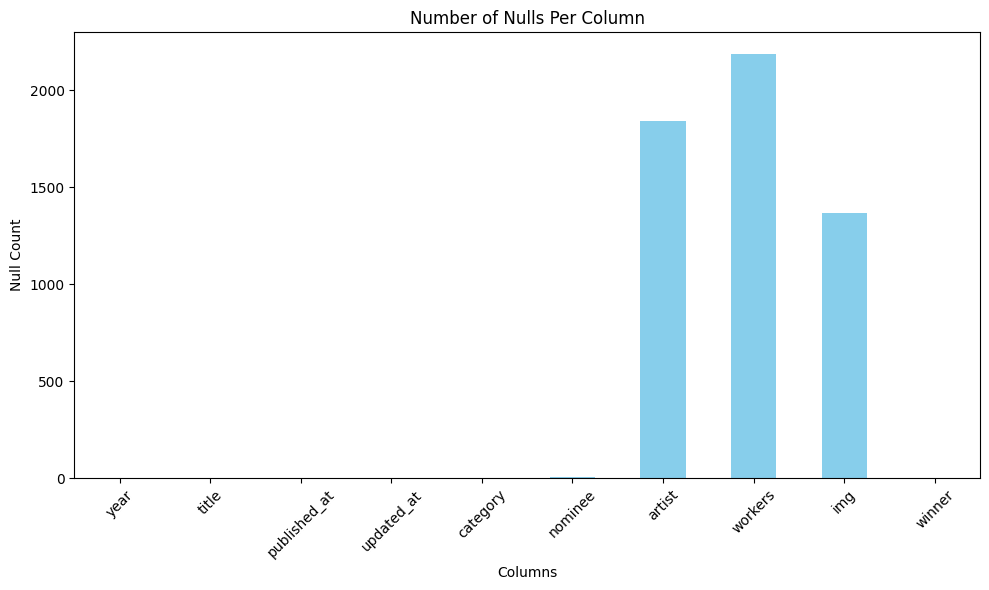

In [60]:
null_counts = grammys_df.isnull().sum()

plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Nulls Per Column')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation=45)
plt.tight_layout()  

plt.show()

In [64]:
grammys_df = grammys_df.drop(columns=['published_at', 'updated_at', 'img', 'year'], axis = 1)

Drops columns that may not be necessary for the analysis, cleaning up the dataset.
'published_at', 'updated_at', 'img' columns are removed, which might contain
timestamps of when the data was published or updated and image links which are not required.

In [65]:
grammys_df['artist'] = grammy_df['artist'].fillna(grammy_df['workers']).str.extract(r'([^\+]+)')[0]
grammys_df['workers'] = grammy_df['workers'].fillna(grammy_df['artist'])

Fills in missing 'artist' values with the value from the 'workers' column and vice versa.
This ensures that if either 'artist' or 'workers' is missing, it can be supplemented by the other.
The regex r'([^\+]+)' extracts the first match before a plus sign if present, assuming that 
in the 'workers' column, multiple names might be separated by plus signs.

In [66]:
grammys_df['category'] = grammy_df['category'].str.replace(r'\[|\]', '', regex=True)

Cleans the 'category' column by removing any square brackets.
This step likely intends to standardize the category names by removing additional
metadata or notes that have been put in square brackets.

In [67]:
mask = grammys_df['category'].str.contains('Artist', case=False, na=False)
grammys_df.loc[mask, ['artist', 'workers']] = grammy_df['nominee']

 Checks if the 'category' column contains the word 'Artist' (case insensitive).
If it does, it replaces the 'artist' and 'workers' fields with the 'nominee' field.
This may be based on an assumption that when the category mentions 'Artist',
the 'nominee' field has the relevant information for both 'artist' and 'workers'.

In [69]:
rows, columns = grammys_df.shape

print(f"rows: {rows}, columns: {columns}")

rows: 4810, columns: 6


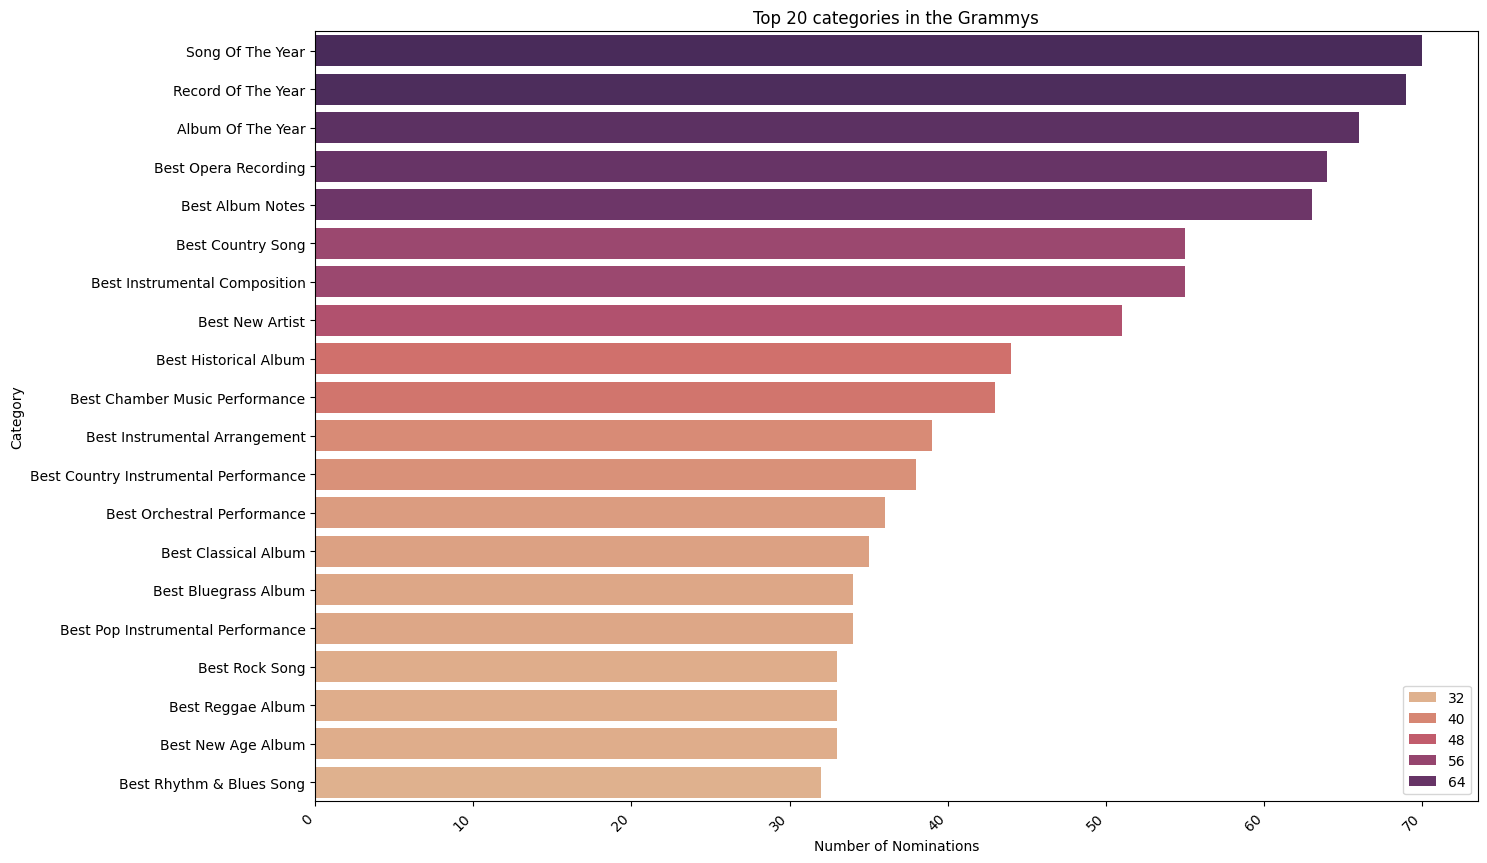

In [47]:
plt.figure(figsize=(15, 10))
top_categories = grammys_df['category'].value_counts().head(20)
sns.barplot(y=top_categories.index, x=top_categories.values, palette='flare', hue=top_categories.values)
plt.title('Top 20 categories in the Grammys')
plt.xlabel('Number of Nominations')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right')
plt.show()

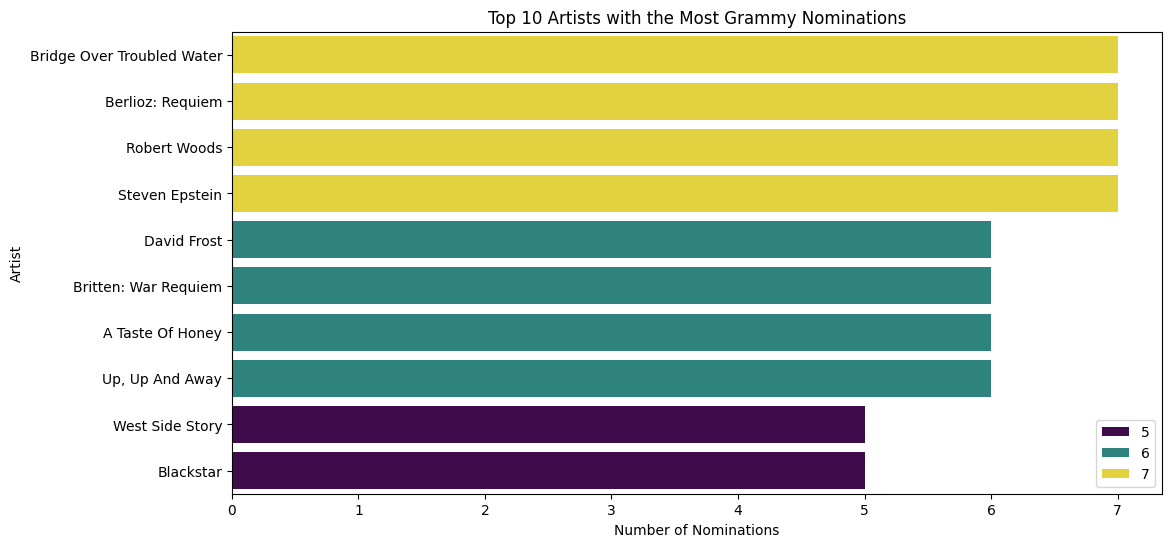

In [48]:
plt.figure(figsize=(12, 6))
top_artists = grammys_df['nominee'].value_counts().head(10)  # Adjust the column name if necessary
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', hue=top_artists.values)
plt.title('Top 10 Artists with the Most Grammy Nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Artist')
plt.show()